# **InterSavy_Data_Science_Internship_Task 3**

## Customer Segmentation Analysis with Python

#### **Dataset**-[https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python]

#**Importing Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
customer_df = pd.read_csv("/content/Mall_Customers (3).csv")

In [ ]:
customer_df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
customer_df.shape

(200, 5)

In [ ]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
customer_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
customer_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
customer_df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

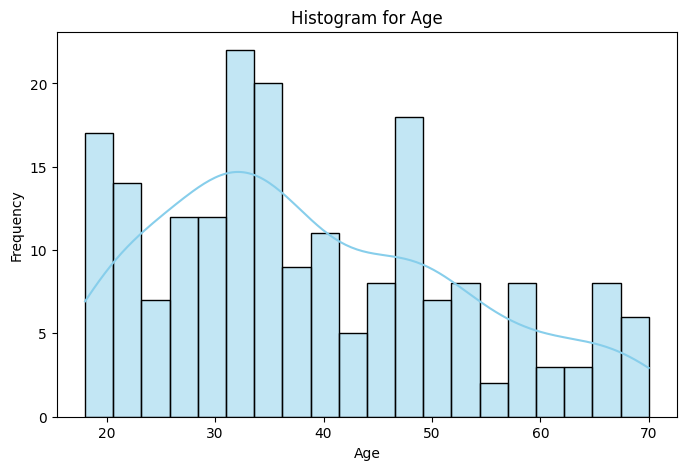

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(customer_df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

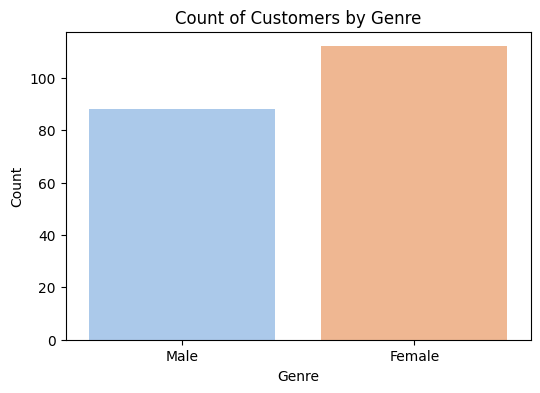

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=customer_df, palette='pastel')
plt.title('Count of Customers by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

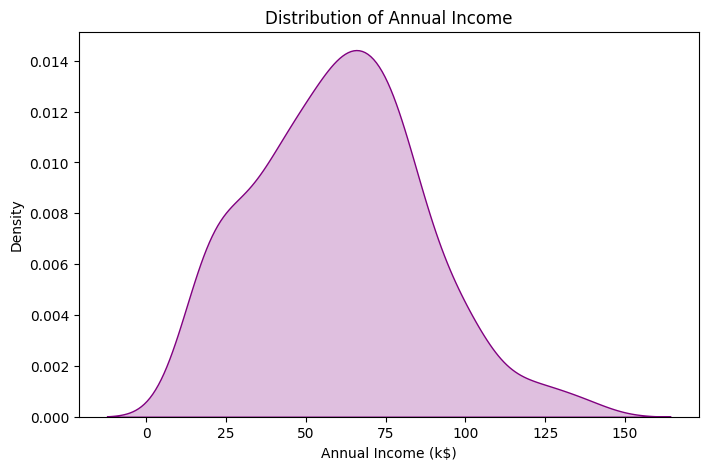

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(customer_df['Annual Income (k$)'], shade=True, color='purple')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Density')
plt.show()

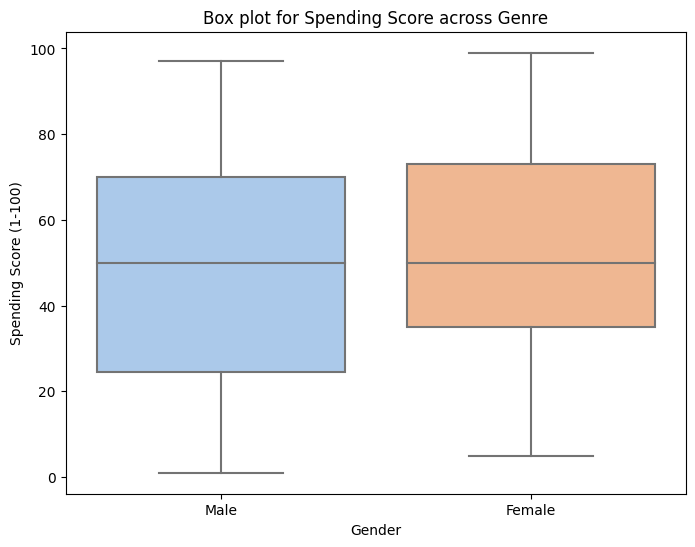

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=customer_df, palette='pastel')
plt.title('Box plot for Spending Score across Genre')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.show()

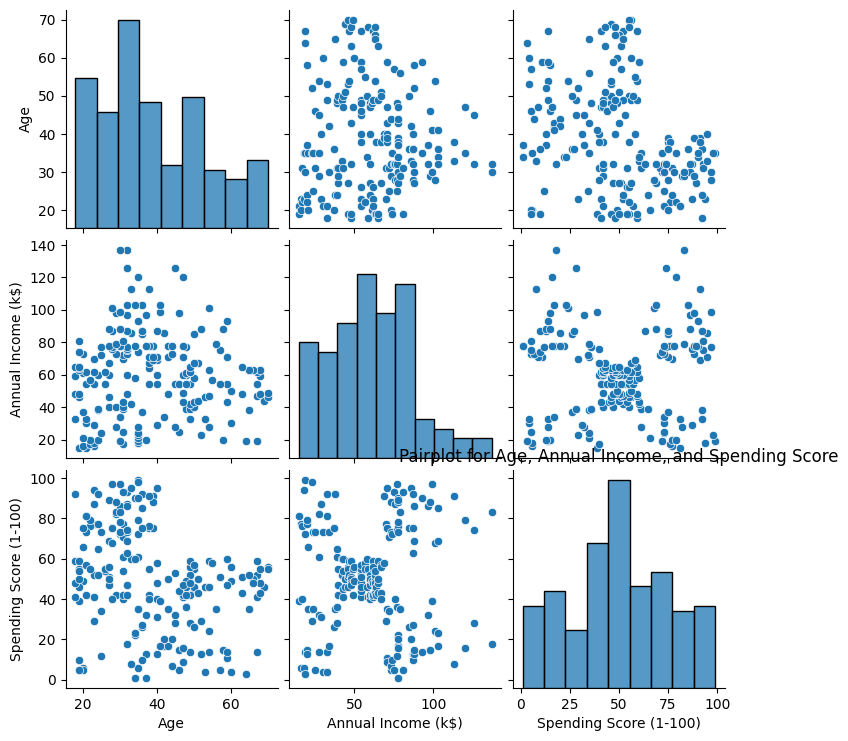

In [ ]:
sns.pairplot(customer_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], palette='Set1')
plt.title('Pairplot for Age, Annual Income, and Spending Score')
plt.show()

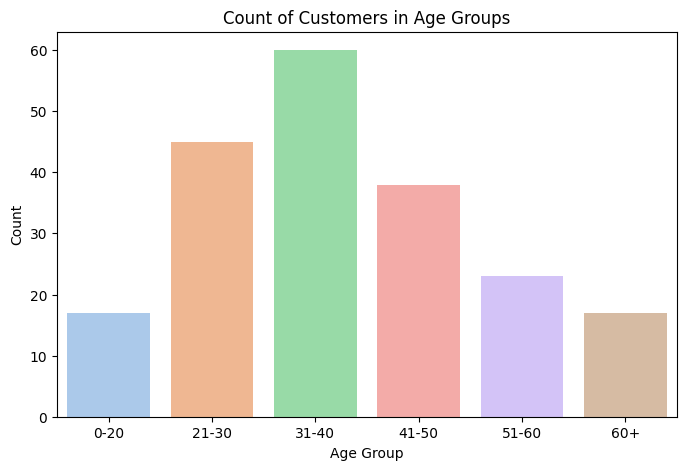

In [ ]:
customer_df['Age_Group'] = pd.cut(customer_df['Age'], bins=[0, 20, 30, 40, 50, 60, 100], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '60+'])
plt.figure(figsize=(8, 5))
sns.countplot(x='Age_Group', data=customer_df, palette='pastel')
plt.title('Count of Customers in Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

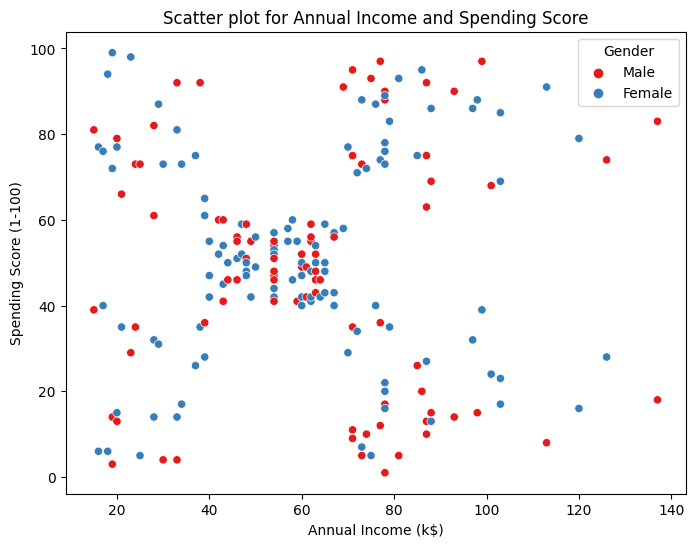

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=customer_df, palette='Set1')
plt.title('Scatter plot for Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

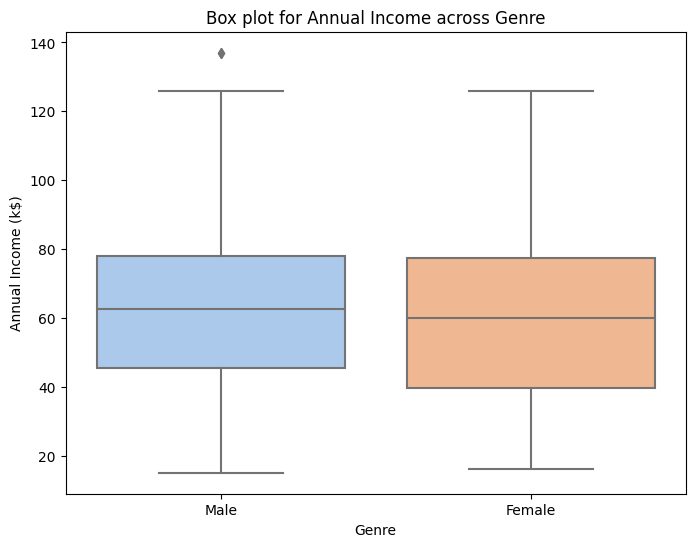

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Annual Income (k$)', data=customer_df, palette='pastel')
plt.title('Box plot for Annual Income across Genre')
plt.xlabel('Genre')
plt.ylabel('Annual Income (k$)')
plt.show()

# **Model Building**

##**K-Means Clustering**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X = customer_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

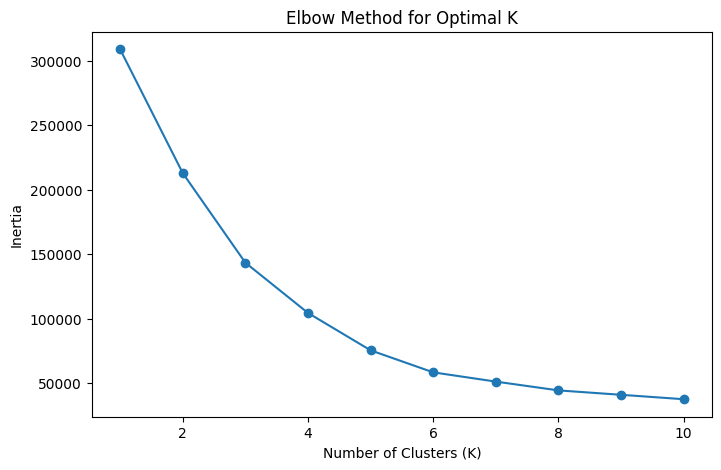

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(X)

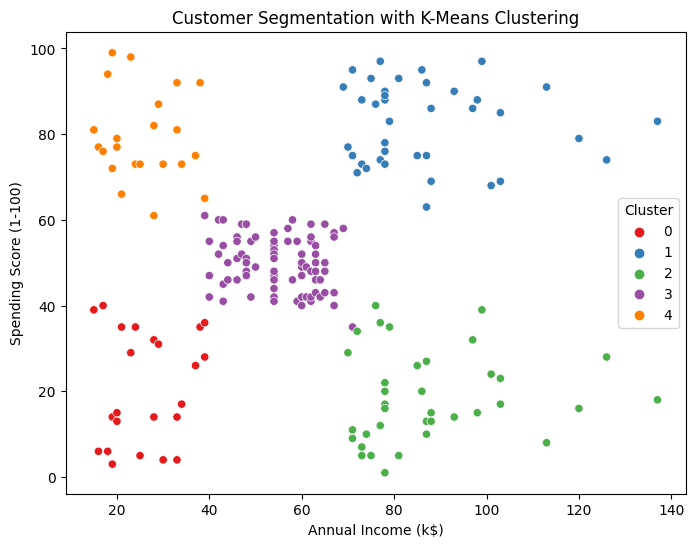

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=customer_df, palette='Set1')
plt.title('Customer Segmentation with K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
cluster_centers = kmeans.cluster_centers_

In [ ]:
for i in range(len(cluster_centers)):
    print(f"Cluster {i} - Center: {cluster_centers[i]}")

Cluster 0 - Center: [45.2173913  26.30434783 20.91304348]
Cluster 1 - Center: [32.69230769 86.53846154 82.12820513]
Cluster 2 - Center: [40.32432432 87.43243243 18.18918919]
Cluster 3 - Center: [43.12658228 54.82278481 49.83544304]
Cluster 4 - Center: [25.27272727 25.72727273 79.36363636]


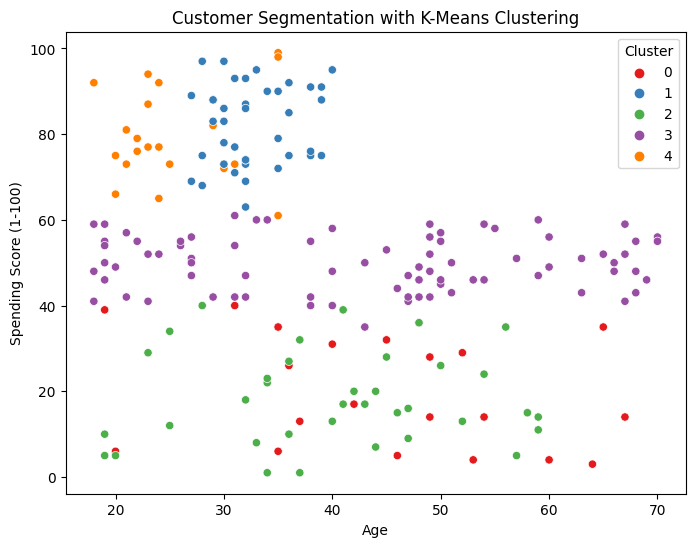

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=customer_df, palette='Set1')
plt.title('Customer Segmentation with K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()